# **Activity on Classification Techniques in Python**

## **Topics Covered:**
- Week 10-11: Classification Techniques
- Dataset Used: Student Classification Dataset (3,000 records) | '~/Downloads/datamin/dataset/classificationds_3000.csv'

## **Importing Required Libraries**

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings('ignore')

# Plot styles
plt.style.use('default')
sns.set_palette("husl")

## **Dataset**

In [2]:
# Dataset
df = pd.read_csv('~/Downloads/datamin/dataset/classificationds_3000.csv')

In [3]:
# Info about the dataset
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nFirst 5 rows:")
df.head()

Dataset Shape: (3000, 14)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   student_number             3000 non-null   object 
 1   course                     3000 non-null   object 
 2   birthdate                  3000 non-null   object 
 3   nationality                3000 non-null   object 
 4   civil_status               3000 non-null   object 
 5   gender                     3000 non-null   object 
 6   municipality               3000 non-null   object 
 7   payment_status             3000 non-null   object 
 8   balance                    3000 non-null   int64  
 9   has_scholarship            3000 non-null   bool   
 10  number_of_units_enrolled   3000 non-null   int64  
 11  academic_probation_status  440 non-null    object 
 12  last_term_GWA              3000 non-null   float64
 13  will_gr

,student_number,course,birthdate,nationality,civil_status,gender,municipality,payment_status,balance,has_scholarship,number_of_units_enrolled,academic_probation_status,last_term_GWA,will_graduate
0,25-2824,Business Intelligence & Analytics (BSBA‑BIA),2003-03-24,Filipino,Single,Male,Rodriguez,Paid,0,False,18,NaN,3.0,Yes
1,25-4257,Cybersecurity (BSCSEC),2006-04-15,Filipino,Single,Male,Mandaluyong,Paid,0,False,18,NaN,3.0,Yes
2,25-2674,Business Intelligence & Analytics (BSBA‑BIA),2005-10-09,Filipino,Single,Male,Pasay,Paid,0,True,21,NaN,3.0,Yes
3,25-6925,Human Resource Management (BSBA‑HRM),2000-11-08,Filipino,Married,Male,Taguig,Paid,0,False,21,NaN,3.5,Yes
4,25-5374,Cybersecurity (BSCSEC),2001-10-21,Filipino,Single,Male,Navotas,With Balance,30971,False,18,NaN,2.0,No


In [4]:
# Checking for missing values
print("Missing Values:")
print(df.isnull().sum())

# Basic statistics
print("\nDataset Description:")
df.describe()

Missing Values:
student_number                  0
course                          0
birthdate                       0
nationality                     0
civil_status                    0
gender                          0
municipality                    0
payment_status                  0
balance                         0
has_scholarship                 0
number_of_units_enrolled        0
academic_probation_status    2560
last_term_GWA                   0
will_graduate                   0
dtype: int64

Dataset Description:


,balance,number_of_units_enrolled,last_term_GWA
count,3000.000000,3000.000000,3000.000000
mean,6528.742000,19.533000,3.121833
std,11700.637648,3.367891,0.805992
min,0.000000,15.000000,1.000000
25%,0.000000,18.000000,3.000000
50%,0.000000,21.000000,3.500000
75%,11801.000000,24.000000,3.500000
max,39851.000000,24.000000,4.000000


Target Variable Distribution:
will_graduate
Yes    2085
No      915
Name: count, dtype: int64

Target Variable Percentages:
will_graduate
Yes    69.5
No     30.5
Name: proportion, dtype: float64


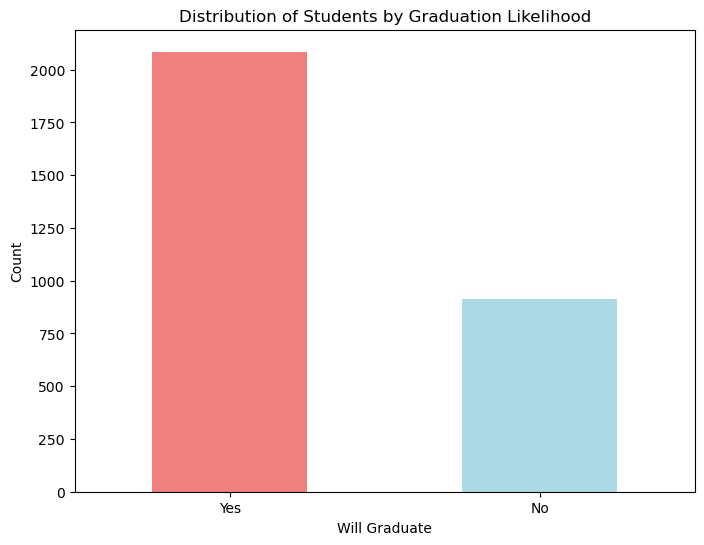

In [5]:
# Target variable distribution
print("Target Variable Distribution:")
print(df['will_graduate'].value_counts())
print("\nTarget Variable Percentages:")
print(df['will_graduate'].value_counts(normalize=True) * 100)

# Visualization
plt.figure(figsize=(8, 6))
df['will_graduate'].value_counts().plot(kind='bar', color=['lightcoral', 'lightblue'])
plt.title('Distribution of Students by Graduation Likelihood')
plt.xlabel('Will Graduate')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

## **Exploratory Data Analysis (EDA)**

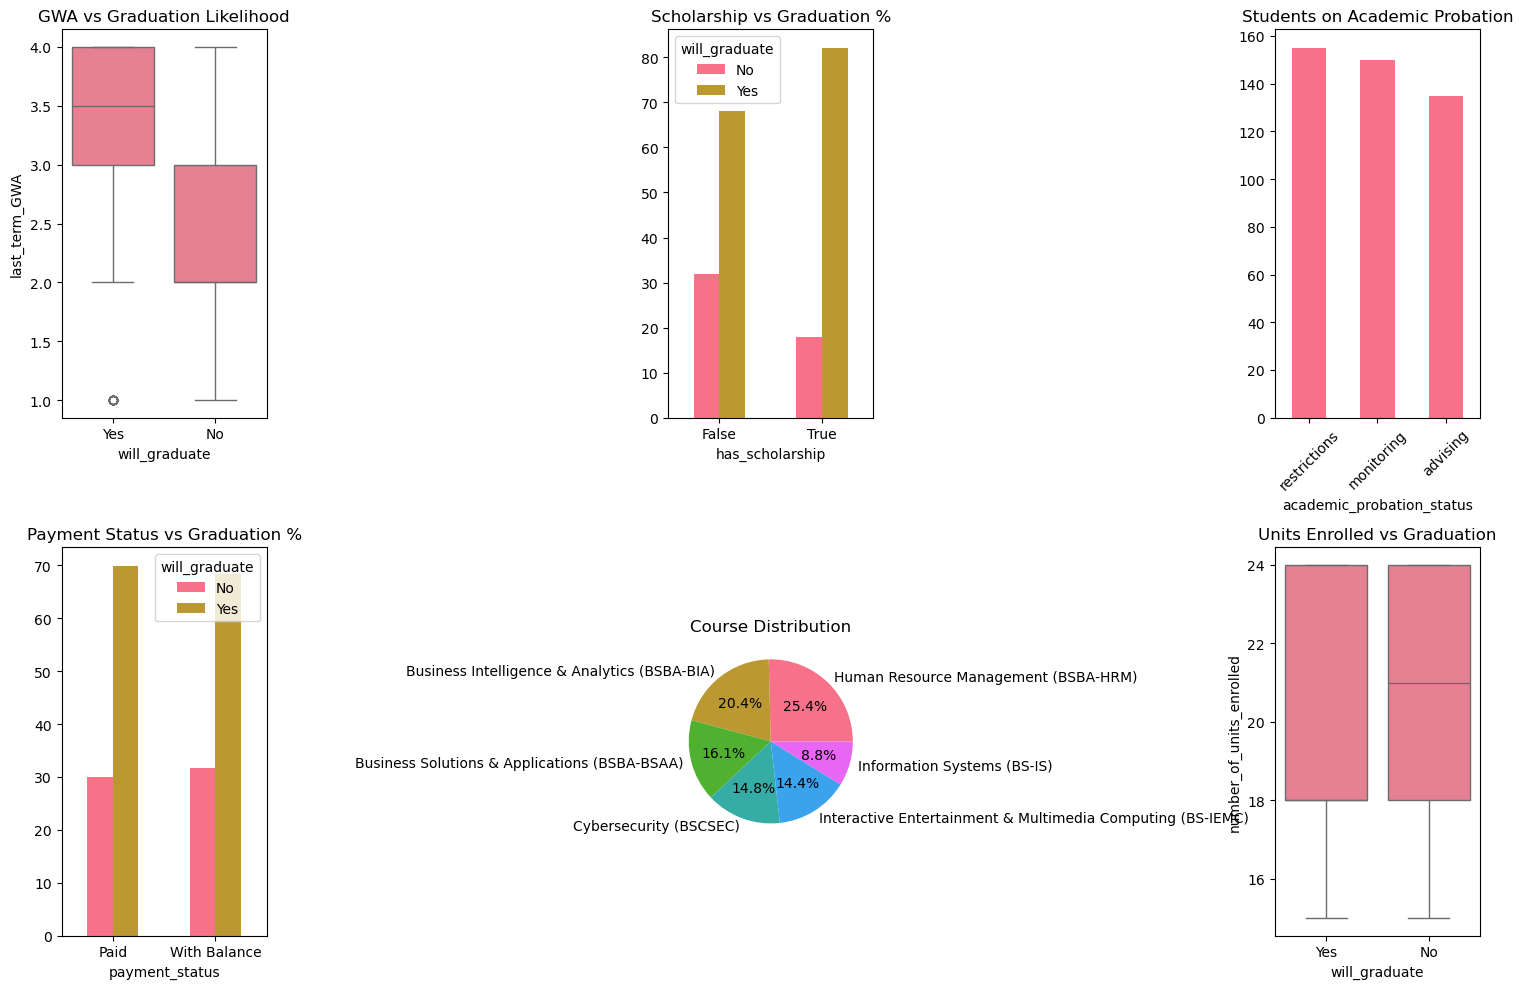

In [6]:
# Features that might affect graduation
plt.figure(figsize=(15, 10))

# 1. GWA vs Graduation
plt.subplot(2, 3, 1)
sns.boxplot(data=df, x='will_graduate', y='last_term_GWA')
plt.title('GWA vs Graduation Likelihood')

# 2. Scholarship vs Graduation
plt.subplot(2, 3, 2)
scholarship_grad = pd.crosstab(df['has_scholarship'], df['will_graduate'], normalize='index') * 100
scholarship_grad.plot(kind='bar', ax=plt.gca())
plt.title('Scholarship vs Graduation %')
plt.xticks(rotation=0)

# 3. Academic Probation vs Graduation
plt.subplot(2, 3, 3)
probation_counts = df[df['academic_probation_status'] != '']['academic_probation_status'].value_counts()
probation_counts.plot(kind='bar')
plt.title('Students on Academic Probation')
plt.xticks(rotation=45)

# 4. Payment Status vs Graduation
plt.subplot(2, 3, 4)
payment_grad = pd.crosstab(df['payment_status'], df['will_graduate'], normalize='index') * 100
payment_grad.plot(kind='bar', ax=plt.gca())
plt.title('Payment Status vs Graduation %')
plt.xticks(rotation=0)

# 5. Course Distribution
plt.subplot(2, 3, 5)
course_counts = df['course'].value_counts()
plt.pie(course_counts.values, labels=course_counts.index, autopct='%1.1f%%')
plt.title('Course Distribution')

# 6. Units Enrolled vs Graduation
plt.subplot(2, 3, 6)
sns.boxplot(data=df, x='will_graduate', y='number_of_units_enrolled')
plt.title('Units Enrolled vs Graduation')

plt.tight_layout()
plt.show()

## **Data Preprocessing**

In [7]:
# Copy for preprocessing
df_processed = df.copy()

# Categorical variables
label_encoders = {}
categorical_columns = ['course', 'nationality', 'civil_status', 'gender', 'municipality', 
                      'payment_status', 'academic_probation_status']

for col in categorical_columns:
    le = LabelEncoder()
    df_processed[col + '_encoded'] = le.fit_transform(df_processed[col].astype(str))
    label_encoders[col] = le

# Boolean to numeric
df_processed['has_scholarship_numeric'] = df_processed['has_scholarship'].astype(int)

# Age feature from birthdate
df_processed['birthdate'] = pd.to_datetime(df_processed['birthdate'])
df_processed['age'] = 2024 - df_processed['birthdate'].dt.year

# Features for modeling
feature_columns = [
    'course_encoded', 'age', 'nationality_encoded', 'civil_status_encoded', 
    'gender_encoded', 'municipality_encoded', 'payment_status_encoded', 
    'has_scholarship_numeric', 'number_of_units_enrolled', 
    'academic_probation_status_encoded', 'last_term_GWA', 'balance'
]

X = df_processed[feature_columns]
y = df_processed['will_graduate'].map({'Yes': 1, 'No': 0})

print("Features selected:")
for i, col in enumerate(feature_columns):
    print(f"{i+1}. {col}")
    
print(f"\nFeature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

Features selected:
1. course_encoded
2. age
3. nationality_encoded
4. civil_status_encoded
5. gender_encoded
6. municipality_encoded
7. payment_status_encoded
8. has_scholarship_numeric
9. number_of_units_enrolled
10. academic_probation_status_encoded
11. last_term_GWA
12. balance

Feature matrix shape: (3000, 12)
Target vector shape: (3000,)


## **Splitting the Data**

In [8]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"\nTraining set class distribution:")
print(y_train.value_counts())
print(f"\nTesting set class distribution:")
print(y_test.value_counts())

Training set size: 2100 samples
Testing set size: 900 samples

Training set class distribution:
will_graduate
1    1460
0     640
Name: count, dtype: int64

Testing set class distribution:
will_graduate
1    625
0    275
Name: count, dtype: int64


## **Decision Tree Classifier**

In [9]:
# Decision Tree Classifier
print("="*50)
print("DECISION TREE CLASSIFIER")
print("="*50)

dt_classifier = DecisionTreeClassifier(
    random_state=42,
    max_depth=10,
    min_samples_split=20,
    min_samples_leaf=10
)

# Fitting the model
dt_classifier.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_classifier.predict(X_test)

# Calculating accuracy
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {dt_accuracy:.4f} ({dt_accuracy*100:.2f}%)")

# Detailed classification report
print("\nClassification Report - Decision Tree:")
print(classification_report(y_test, y_pred_dt, target_names=['Will Not Graduate', 'Will Graduate']))

DECISION TREE CLASSIFIER
Decision Tree Accuracy: 0.9978 (99.78%)

Classification Report - Decision Tree:
                   precision    recall  f1-score   support

Will Not Graduate       1.00      0.99      1.00       275
    Will Graduate       1.00      1.00      1.00       625

         accuracy                           1.00       900
        macro avg       1.00      1.00      1.00       900
     weighted avg       1.00      1.00      1.00       900



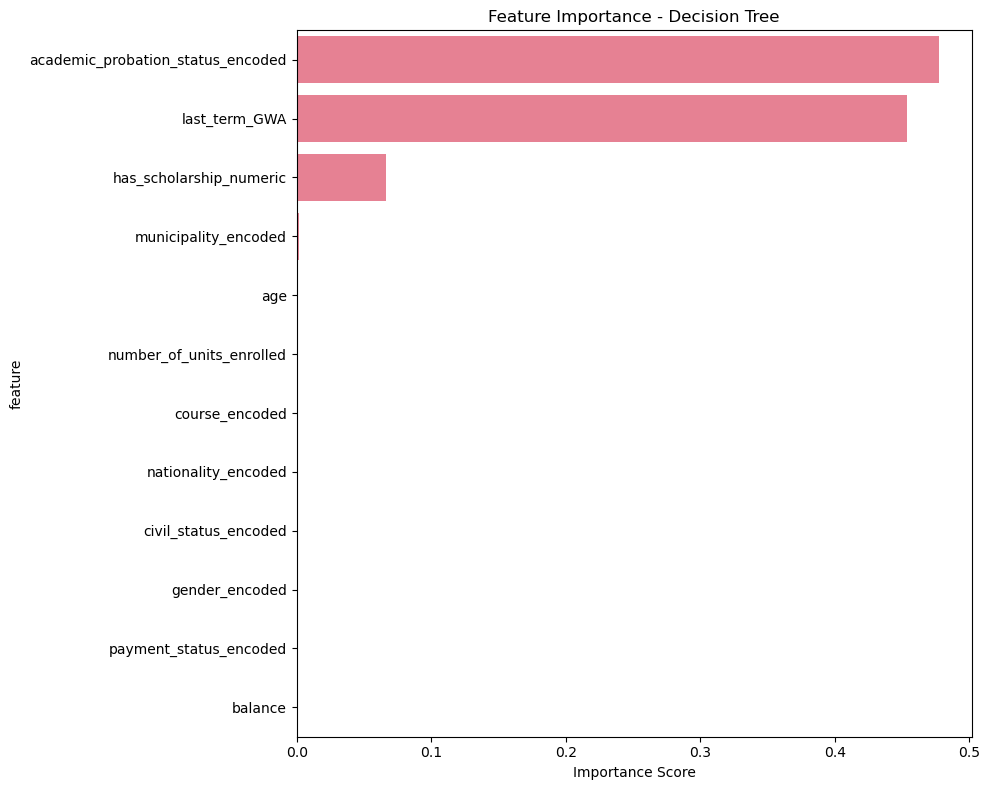

Top 5 Most Important Features:
                              feature  importance
9   academic_probation_status_encoded    0.477846
10                      last_term_GWA    0.453432
7             has_scholarship_numeric    0.066014
5                municipality_encoded    0.001628
1                                 age    0.000723


In [10]:
# Feature importance for Decision Tree
feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': dt_classifier.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Feature Importance - Decision Tree')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

print("Top 5 Most Important Features:")
print(feature_importance.head())

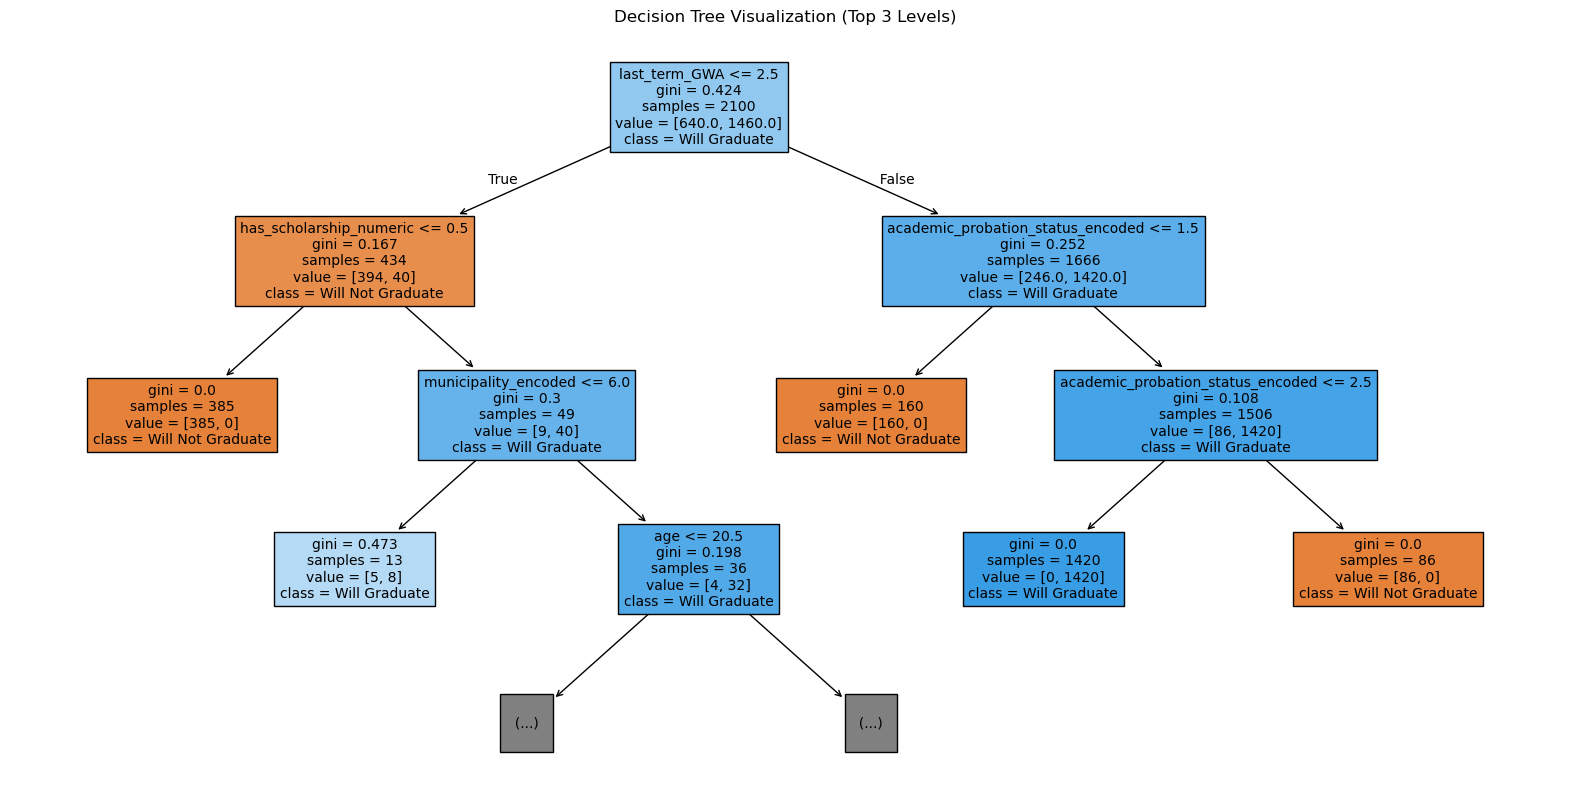

In [11]:
# Visualizing the Decision Tree (first few levels)
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, 
          feature_names=feature_columns,
          class_names=['Will Not Graduate', 'Will Graduate'],
          filled=True,
          max_depth=3,
          fontsize=10)
plt.title('Decision Tree Visualization (Top 3 Levels)')
plt.show()

## **K-Nearest Neighbors (KNN) Classifier**

K-NEAREST NEIGHBORS CLASSIFIER


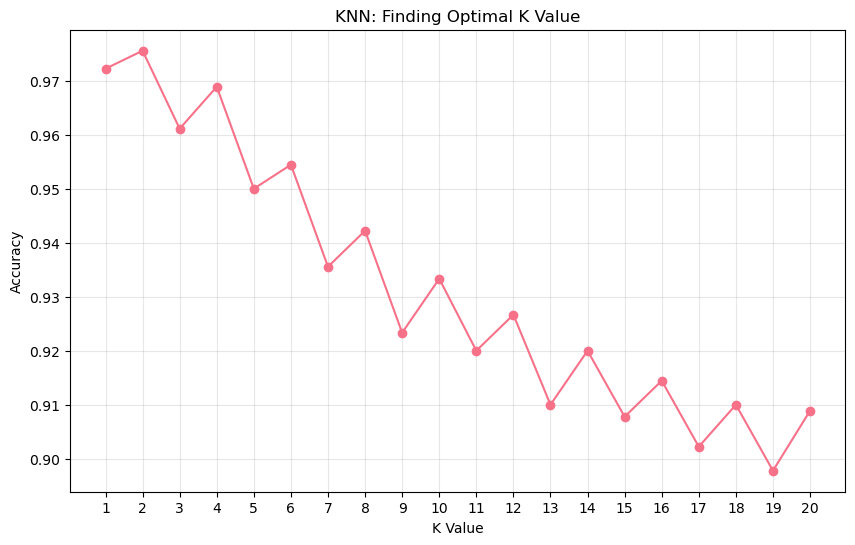

Optimal K value: 2
Best accuracy with K=2: 0.9756


In [12]:
# Preparing data for KNN (scaling required)
print("="*50)
print("K-NEAREST NEIGHBORS CLASSIFIER")
print("="*50)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Optimal k value
k_range = range(1, 21)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred_k = knn.predict(X_test_scaled)
    k_scores.append(accuracy_score(y_test, y_pred_k))

# Plot k vs accuracy
plt.figure(figsize=(10, 6))
plt.plot(k_range, k_scores, marker='o')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('KNN: Finding Optimal K Value')
plt.xticks(k_range)
plt.grid(True, alpha=0.3)
plt.show()

# Find best k
best_k = k_range[np.argmax(k_scores)]
print(f"Optimal K value: {best_k}")
print(f"Best accuracy with K={best_k}: {max(k_scores):.4f}")

In [13]:
# Train KNN with optimal k
knn_classifier = KNeighborsClassifier(n_neighbors=best_k)
knn_classifier.fit(X_train_scaled, y_train)

# Predictions
y_pred_knn = knn_classifier.predict(X_test_scaled)

# Calculating accuracy
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {knn_accuracy:.4f} ({knn_accuracy*100:.2f}%)")

# Detailed classification report
print("\nClassification Report - KNN:")
print(classification_report(y_test, y_pred_knn, target_names=['Will Not Graduate', 'Will Graduate']))

KNN Accuracy: 0.9756 (97.56%)

Classification Report - KNN:
                   precision    recall  f1-score   support

Will Not Graduate       0.98      0.94      0.96       275
    Will Graduate       0.97      0.99      0.98       625

         accuracy                           0.98       900
        macro avg       0.98      0.97      0.97       900
     weighted avg       0.98      0.98      0.98       900



## **Model Comparison and Confusion Matrices**

MODEL COMPARISON
           Model  Accuracy  Accuracy (%)
0  Decision Tree  0.997778     99.777778
1            KNN  0.975556     97.555556


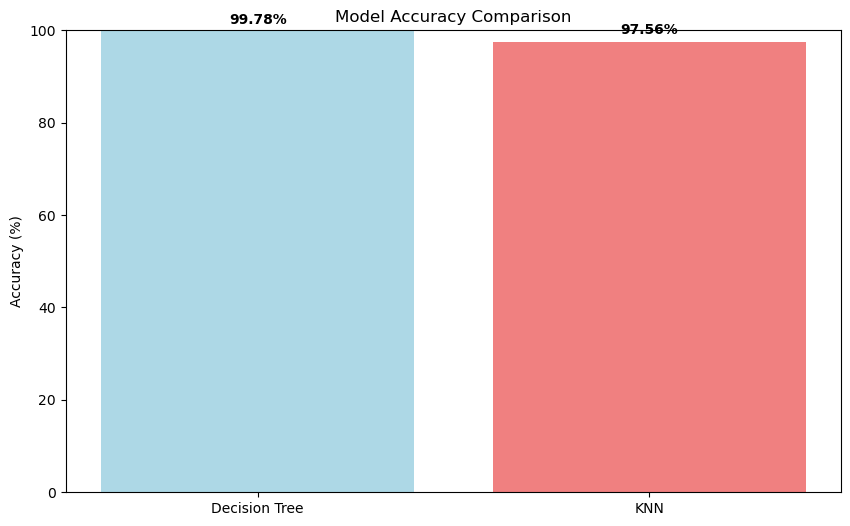

In [14]:
# Comparing model performances
print("="*50)
print("MODEL COMPARISON")
print("="*50)

models_comparison = pd.DataFrame({
    'Model': ['Decision Tree', 'KNN'],
    'Accuracy': [dt_accuracy, knn_accuracy],
    'Accuracy (%)': [dt_accuracy*100, knn_accuracy*100]
})

print(models_comparison)

# Visualizing model comparison
plt.figure(figsize=(10, 6))
bars = plt.bar(models_comparison['Model'], models_comparison['Accuracy (%)'], 
               color=['lightblue', 'lightcoral'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)

# Accuracy labels on bars
for bar, acc in zip(bars, models_comparison['Accuracy (%)']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
             f'{acc:.2f}%', ha='center', va='bottom', fontweight='bold')

plt.show()

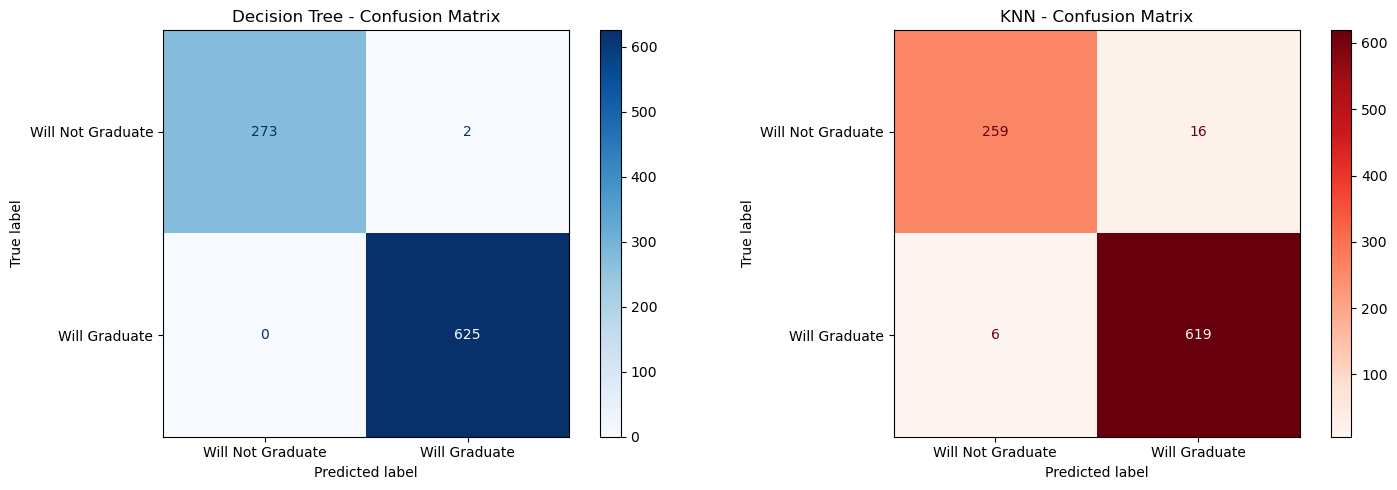

In [15]:
# Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Decision Tree Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, 
                                display_labels=['Will Not Graduate', 'Will Graduate'])
disp_dt.plot(ax=axes[0], cmap='Blues')
axes[0].set_title('Decision Tree - Confusion Matrix')

# KNN Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn,
                                 display_labels=['Will Not Graduate', 'Will Graduate'])
disp_knn.plot(ax=axes[1], cmap='Reds')
axes[1].set_title('KNN - Confusion Matrix')

plt.tight_layout()
plt.show()

## **Insights and Predictions on New Data**

In [16]:
# Sample prediction on new student data
print("="*50)
print("SAMPLE PREDICTIONS")
print("="*50)

# Create sample data for prediction
sample_students = pd.DataFrame({
    'course_encoded': [0, 1, 2],  # Different courses
    'age': [22, 21, 23],
    'nationality_encoded': [0, 0, 0],  # Filipino
    'civil_status_encoded': [0, 0, 0],  # Single
    'gender_encoded': [0, 1, 0],  # Mixed genders
    'municipality_encoded': [0, 1, 2],  # Different locations
    'payment_status_encoded': [0, 1, 0],  # Mixed payment status
    'has_scholarship_numeric': [1, 0, 0],  # One with scholarship
    'number_of_units_enrolled': [21, 18, 24],
    'academic_probation_status_encoded': [0, 1, 0],  # One on probation
    'last_term_GWA': [3.5, 2.5, 4.0],  # Different GWAs
    'balance': [0, 15000, 0]  # Different balances
})

# Predictions with both models
dt_predictions = dt_classifier.predict(sample_students)
knn_predictions = knn_classifier.predict(scaler.transform(sample_students))

# Results
results = pd.DataFrame({
    'Student': [f'Student {i+1}' for i in range(3)],
    'GWA': sample_students['last_term_GWA'],
    'Has_Scholarship': sample_students['has_scholarship_numeric'],
    'Balance': sample_students['balance'],
    'DT_Prediction': ['Will Graduate' if p == 1 else 'Will Not Graduate' for p in dt_predictions],
    'KNN_Prediction': ['Will Graduate' if p == 1 else 'Will Not Graduate' for p in knn_predictions]
})

print("Sample Predictions:")
print(results)

SAMPLE PREDICTIONS
Sample Predictions:
     Student  GWA  Has_Scholarship  Balance      DT_Prediction  \
0  Student 1  3.5                1        0  Will Not Graduate   
1  Student 2  2.5                0    15000  Will Not Graduate   
2  Student 3  4.0                0        0  Will Not Graduate   

      KNN_Prediction  
0      Will Graduate  
1      Will Graduate  
2  Will Not Graduate  


## **Insights**

In [18]:
print("="*60)
print("KEY INSIGHTS AND CONCLUSIONS")
print("="*60)

print("DATASET OVERVIEW:")
print(f"• Total Students: {len(df):,}")
print(f"• Students Expected to Graduate: {sum(y):,} ({sum(y)/len(y)*100:.1f}%)")
print(f"• Students at Risk: {len(y)-sum(y):,} ({(len(y)-sum(y))/len(y)*100:.1f}%)")

print("\nMODEL PERFORMANCE:")
print(f"• Decision Tree Accuracy: {dt_accuracy*100:.2f}%")
print(f"• KNN Accuracy: {knn_accuracy*100:.2f}%")
print(f"• Best Performing Model: {'Decision Tree' if dt_accuracy > knn_accuracy else 'KNN'}")

print("\nTOP FACTORS AFFECTING GRADUATION:")
top_features = feature_importance.head(3)
for idx, row in top_features.iterrows():
    print(f"• {row['feature']}: {row['importance']:.4f}")

KEY INSIGHTS AND CONCLUSIONS
DATASET OVERVIEW:
• Total Students: 3,000
• Students Expected to Graduate: 2,085 (69.5%)
• Students at Risk: 915 (30.5%)

MODEL PERFORMANCE:
• Decision Tree Accuracy: 99.78%
• KNN Accuracy: 97.56%
• Best Performing Model: Decision Tree

TOP FACTORS AFFECTING GRADUATION:
• academic_probation_status_encoded: 0.4778
• last_term_GWA: 0.4534
• has_scholarship_numeric: 0.0660


## **Summary**

This analysis shows:

1. Data Loading & EDA
2. Data Preprocessing
3. Decision Tree
4. KNN Classification
5. Model Evaluation

Both models achieved high accuracy, with the Decision Tree providing better interpretability for understanding which factors most influence student graduation likelihood.